In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from wrangle_zillow import acquire_zillow
from wrangle_zillow import missing_col_values
from wrangle_zillow import missing_row_values
from wrangle_zillow import single_unit_properties
from wrangle_zillow import data_prep
from wrangle_zillow import split_data
from wrangle_zillow import remove_outliers
from wrangle_zillow import split_by_region

In [2]:
df = acquire_zillow()
df.head()

Reading from csv file...


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
df = single_unit_properties(df)
remove_cols = ['buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc']
df = data_prep(df, cols_to_remove=remove_cols, prop_required_column=.5, prop_required_row=.75)


In [4]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((28544, 30), (12234, 30), (10195, 30))

In [5]:
out_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',]
train = remove_outliers(train, 1.5, out_columns)

In [8]:
scale_cols = train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude']]
scaler = MinMaxScaler()
scaler.fit(scale_cols)
scaled_df = scaler.transform(scale_cols)
scaled_cols_df = pd.DataFrame(scaled_df, columns=scale_cols.columns, index=scale_cols.index)

In [6]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
57956,2335449,12844928,3.0,4.0,3.0,2650.0,2650.0,6037.0,3.0,33982542.0,...,1987.0,413700.0,793000.0,2016.0,379300.0,9646.34,6.037409e+13,0.026122,2017-05-26,Single Family Residential
73971,244642,12075460,3.0,3.0,3.0,3094.0,3094.0,6037.0,3.0,34187250.0,...,1949.0,133565.0,231922.0,2016.0,98357.0,3221.28,6.037461e+13,-0.030712,2017-05-31,Single Family Residential
8195,877004,14282224,2.0,3.0,2.0,1647.0,1647.0,6059.0,2.0,33639152.0,...,1958.0,79671.0,1092488.0,2016.0,1012817.0,12046.64,6.059063e+13,-0.013707,2017-08-07,Single Family Residential
7355,2249559,14393950,1.5,3.0,1.5,1174.0,1174.0,6059.0,1.0,33572200.0,...,1982.0,93580.0,366000.0,2016.0,272420.0,3744.58,6.059042e+13,0.028213,2017-05-24,Single Family Residential
58226,1156183,12514614,3.0,3.0,3.0,1742.0,1742.0,6037.0,3.0,33794806.0,...,1949.0,164991.0,525213.0,2016.0,360222.0,6283.46,6.037574e+13,-0.002124,2017-06-22,Single Family Residential


In [9]:
scaled_cols_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude
57956,0.666667,0.666667,0.740807,0.435923,0.804810
73971,0.666667,0.333333,0.872479,0.575069,0.652562
8195,0.333333,0.333333,0.443357,0.202511,0.816555
7355,0.166667,0.333333,0.303084,0.157001,0.924487
58226,0.666667,0.333333,0.471530,0.308313,0.695515


---

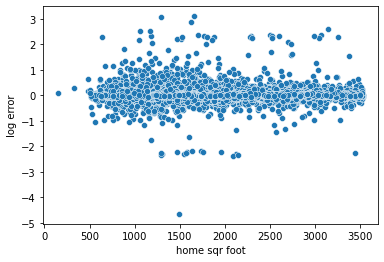

In [11]:
sns.scatterplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("home sqr foot")
plt.ylabel("log error")
plt.show()

In [12]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.calculatedfinishedsquarefeet
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.01345112500446546 P-Value = 0.029782946539496435
-----------------------------------
We reject the null hypothesis


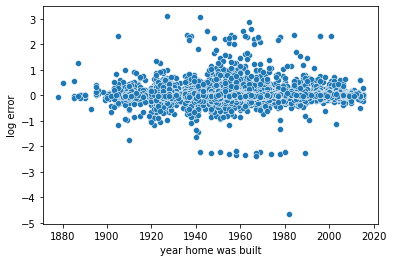

In [13]:
sns.scatterplot(x="yearbuilt", y="logerror", data=train)
plt.xlabel("year home was built")
plt.ylabel("log error")
plt.show()

In [14]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.yearbuilt
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.009893873297234986 P-Value = 0.10998182422514384
-----------------------------------
We do not reject the null hypothesis


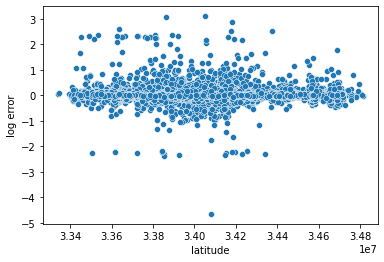

In [16]:
sns.scatterplot(x="latitude", y="logerror", data=train)
plt.xlabel("latitude")
plt.ylabel("log error")
plt.show()

In [17]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.latitude
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = -0.016678118482840593 P-Value = 0.007052903217613151
-----------------------------------
We reject the null hypothesis


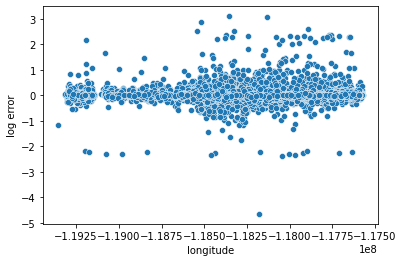

In [18]:
sns.scatterplot(x="longitude", y="logerror", data=train)
plt.xlabel("longitude")
plt.ylabel("log error")
plt.show()

In [19]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.longitude
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.022473512518182796 P-Value = 0.00028256268153665446
-----------------------------------
We reject the null hypothesis


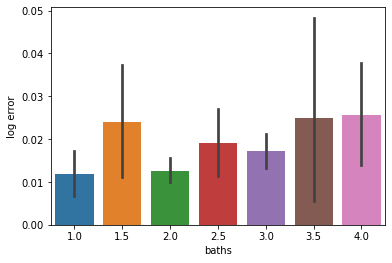

In [20]:
sns.barplot(x="bathroomcnt", y="logerror", data=train)
plt.xlabel("baths")
plt.ylabel("log error")
plt.show()

In [21]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.bathroomcnt
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.015931904262757063 P-Value = 0.010059711283207814
-----------------------------------
We reject the null hypothesis


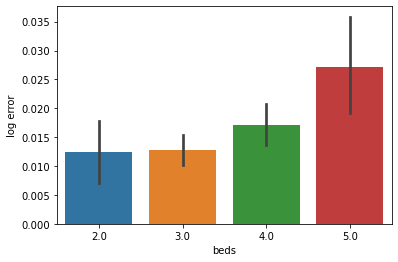

In [22]:
sns.barplot(x="bedroomcnt", y="logerror", data=train)
plt.xlabel("beds")
plt.ylabel("log error")
plt.show()

In [23]:
#assign an alpha value
alpha = 0.05
#assign the x and y variables from the train dataset
x = train.bedroomcnt
y = train.logerror
#run a pearson r correlation test
corr, p = stats.pearsonr(x, y)
#output the results of the test
print(f'Correlation Coefficient = {corr} P-Value = {p}')
print('-----------------------------------')
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

Correlation Coefficient = 0.0182726424149222 P-Value = 0.0031575247715086353
-----------------------------------
We reject the null hypothesis


---

# restart kernel

In [32]:
df = acquire_zillow()
df.head()

Reading from csv file...


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [33]:
df = single_unit_properties(df)
remove_cols = ['buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc']
df = data_prep(df, cols_to_remove=remove_cols, prop_required_column=.5, prop_required_row=.75)


In [34]:
df1, df2, df3 = split_by_region(df)
df1['dist_lat'] = df1.latitude - 34012355
df1['dist_long'] = df1.longitude - (-118498665)
df2['dist_lat'] = df2.latitude - 33640954
df2['dist_long'] = df2.longitude - (-117978893)
df3['dist_lat'] = df3.latitude - 34267111
df3['dist_long'] = df3.longitude - (-119278788)
train1, validate1, test1 = split_data(df1)
train2, validate2, test2 = split_data(df2)
train3, validate3, test3 = split_data(df3)

In [35]:
out_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',]
train1 = remove_outliers(train1, 1.5, out_columns)
train2 = remove_outliers(train2, 1.5, out_columns)
train3 = remove_outliers(train3, 1.5, out_columns)


In [36]:
scale_cols1 = train1[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'dist_lat', 'dist_long']]
scaler = MinMaxScaler()
scaler.fit(scale_cols1)
scaled_df1 = scaler.transform(scale_cols1)
scaled_cols_df1 = pd.DataFrame(scaled_df1, columns=scale_cols1.columns, index=scale_cols1.index)



In [37]:
scale_cols2 = train2[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'dist_lat', 'dist_long']]
scaler = MinMaxScaler()
scaler.fit(scale_cols2)
scaled_df2 = scaler.transform(scale_cols2)
scaled_cols_df2 = pd.DataFrame(scaled_df2, columns=scale_cols2.columns, index=scale_cols2.index)


In [38]:
scale_cols3 = train3[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'dist_lat', 'dist_long']]
scaler = MinMaxScaler()
scaler.fit(scale_cols3)
scaled_df3 = scaler.transform(scale_cols3)
scaled_cols_df3 = pd.DataFrame(scaled_df3, columns=scale_cols3.columns, index=scale_cols3.index)


---

# DF1

In [42]:
train1.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,dist_lat,dist_long
54251,560506,12724517,1.0,3.0,1.0,1056.0,1056.0,6037.0,1.0,33919508.0,...,327119.0,2016.0,169448.0,4465.70,6.037550e+13,0.022905,2017-08-17,Single Family Residential,-92847.0,408770.0
66483,329959,10862352,2.0,3.0,2.0,1911.0,1911.0,6037.0,2.0,34144563.0,...,1064996.0,2016.0,851997.0,13018.79,6.037142e+13,-0.039135,2017-03-21,Single Family Residential,132208.0,52161.0
8143,2076185,11182996,3.0,5.0,3.0,2603.0,2603.0,6037.0,3.0,34616817.0,...,346231.0,2016.0,121851.0,5163.27,6.037910e+13,0.074580,2017-08-01,Single Family Residential,604462.0,280717.0
40171,529653,12439184,2.0,3.0,2.0,1378.0,1378.0,6037.0,2.0,33815291.0,...,615400.0,2016.0,462718.0,7384.35,6.037574e+13,-0.024070,2017-06-30,Single Family Residential,-197064.0,402059.0
37135,1045800,10900954,2.0,2.0,2.0,1066.0,1066.0,6037.0,2.0,34156942.0,...,626625.0,2016.0,484093.0,7527.80,6.037143e+13,0.174064,2017-04-27,Single Family Residential,144587.0,115813.0


In [40]:
scaled_cols_df1.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,dist_lat,dist_long
54251,0.000000,0.333333,0.288449,0.393231,0.672171,0.393231,0.672171
66483,0.333333,0.333333,0.561264,0.546168,0.374471,0.546168,0.374471
8143,0.666667,1.000000,0.782068,0.867092,0.565272,0.867092,0.565272
40171,0.333333,0.333333,0.391193,0.322409,0.666569,0.322409,0.666569
37135,0.333333,0.000000,0.291640,0.554581,0.427608,0.554581,0.427608


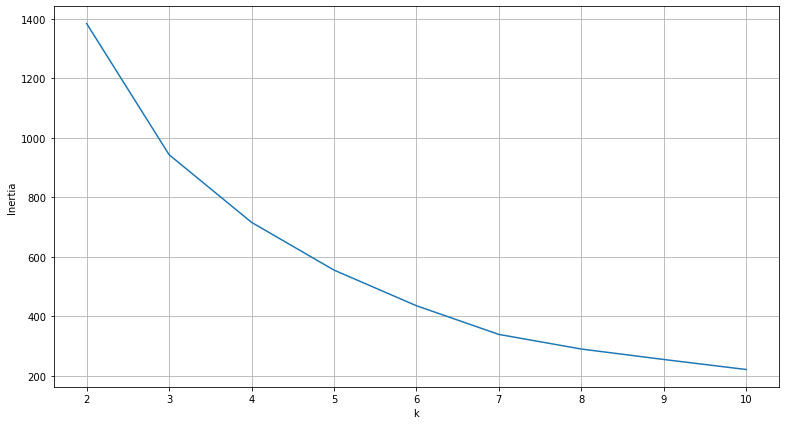

In [41]:
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']
x = scaled_cols_df1[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [46]:
x = scaled_cols_df1[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
train1['cluster'] = kmeans.predict(x)

In [47]:
train1.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,dist_lat,dist_long,cluster
54251,560506,12724517,1.0,3.0,1.0,1056.0,1056.0,6037.0,1.0,33919508.0,...,2016.0,169448.0,4465.70,6.037550e+13,0.022905,2017-08-17,Single Family Residential,-92847.0,408770.0,2
66483,329959,10862352,2.0,3.0,2.0,1911.0,1911.0,6037.0,2.0,34144563.0,...,2016.0,851997.0,13018.79,6.037142e+13,-0.039135,2017-03-21,Single Family Residential,132208.0,52161.0,1
8143,2076185,11182996,3.0,5.0,3.0,2603.0,2603.0,6037.0,3.0,34616817.0,...,2016.0,121851.0,5163.27,6.037910e+13,0.074580,2017-08-01,Single Family Residential,604462.0,280717.0,0
40171,529653,12439184,2.0,3.0,2.0,1378.0,1378.0,6037.0,2.0,33815291.0,...,2016.0,462718.0,7384.35,6.037574e+13,-0.024070,2017-06-30,Single Family Residential,-197064.0,402059.0,1
37135,1045800,10900954,2.0,2.0,2.0,1066.0,1066.0,6037.0,2.0,34156942.0,...,2016.0,484093.0,7527.80,6.037143e+13,0.174064,2017-04-27,Single Family Residential,144587.0,115813.0,2


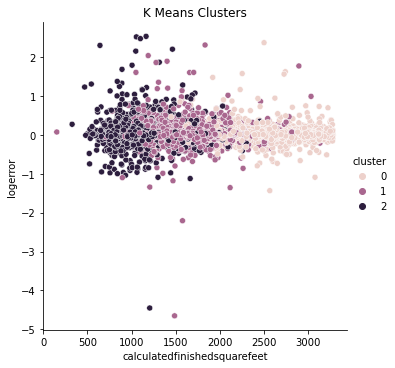

In [48]:
sns.relplot(data=train1, y='logerror', x='calculatedfinishedsquarefeet', hue='cluster')
plt.title('K Means Clusters')
plt.show()

In [49]:
clust_1 = train1[train1['cluster']== 0]
clust_2 = train1[train1['cluster']== 1]
clust_3 = train1[train1['cluster']== 2]
clust_1.logerror.mean(), clust_2.logerror.mean(), clust_3.logerror.mean()

(0.01598688271715611, 0.01224553420884305, 0.011626841427034032)

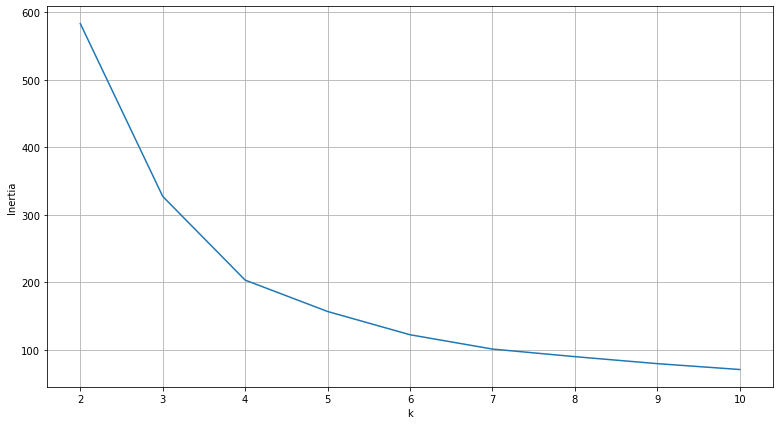

In [50]:
cols = ['latitude', 'longitude']
x = scaled_cols_df1[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [51]:
x = scaled_cols_df1[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
train1['cluster'] = kmeans.predict(x)

In [52]:
train1.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,dist_lat,dist_long,cluster
54251,560506,12724517,1.0,3.0,1.0,1056.0,1056.0,6037.0,1.0,33919508.0,...,2016.0,169448.0,4465.70,6.037550e+13,0.022905,2017-08-17,Single Family Residential,-92847.0,408770.0,3
66483,329959,10862352,2.0,3.0,2.0,1911.0,1911.0,6037.0,2.0,34144563.0,...,2016.0,851997.0,13018.79,6.037142e+13,-0.039135,2017-03-21,Single Family Residential,132208.0,52161.0,1
8143,2076185,11182996,3.0,5.0,3.0,2603.0,2603.0,6037.0,3.0,34616817.0,...,2016.0,121851.0,5163.27,6.037910e+13,0.074580,2017-08-01,Single Family Residential,604462.0,280717.0,2
40171,529653,12439184,2.0,3.0,2.0,1378.0,1378.0,6037.0,2.0,33815291.0,...,2016.0,462718.0,7384.35,6.037574e+13,-0.024070,2017-06-30,Single Family Residential,-197064.0,402059.0,3
37135,1045800,10900954,2.0,2.0,2.0,1066.0,1066.0,6037.0,2.0,34156942.0,...,2016.0,484093.0,7527.80,6.037143e+13,0.174064,2017-04-27,Single Family Residential,144587.0,115813.0,1


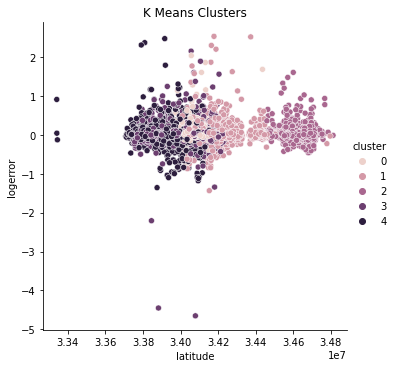

In [53]:
sns.relplot(data=train1, y='logerror', x='latitude', hue='cluster')
plt.title('K Means Clusters')
plt.show()

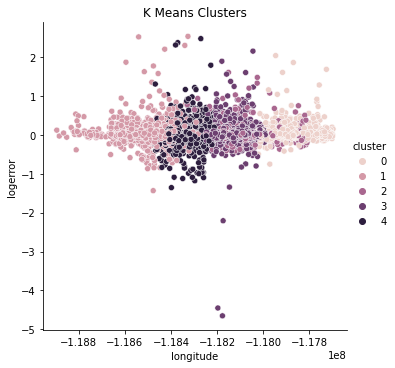

In [54]:
sns.relplot(data=train1, y='logerror', x='longitude', hue='cluster')
plt.title('K Means Clusters')
plt.show()

In [55]:
clust_1 = train1[train1['cluster']== 0]
clust_2 = train1[train1['cluster']== 1]
clust_3 = train1[train1['cluster']== 2]
clust_1.logerror.mean(), clust_2.logerror.mean(), clust_3.logerror.mean()

(0.0271628182289897, 0.016279960424739025, 0.015942878625590497)

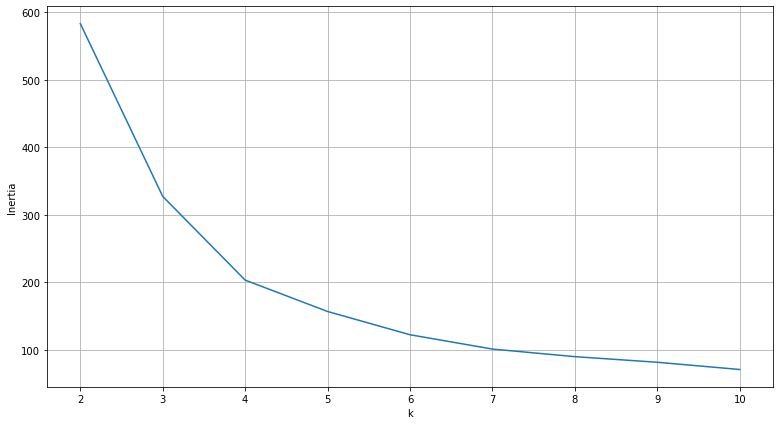

In [56]:
cols = ['dist_lat', 'dist_long']
x = scaled_cols_df1[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [57]:
x = scaled_cols_df1[['dist_lat', 'dist_long']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
train1['cluster'] = kmeans.predict(x)

In [58]:
train1.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,dist_lat,dist_long,cluster
54251,560506,12724517,1.0,3.0,1.0,1056.0,1056.0,6037.0,1.0,33919508.0,...,2016.0,169448.0,4465.70,6.037550e+13,0.022905,2017-08-17,Single Family Residential,-92847.0,408770.0,3
66483,329959,10862352,2.0,3.0,2.0,1911.0,1911.0,6037.0,2.0,34144563.0,...,2016.0,851997.0,13018.79,6.037142e+13,-0.039135,2017-03-21,Single Family Residential,132208.0,52161.0,2
8143,2076185,11182996,3.0,5.0,3.0,2603.0,2603.0,6037.0,3.0,34616817.0,...,2016.0,121851.0,5163.27,6.037910e+13,0.074580,2017-08-01,Single Family Residential,604462.0,280717.0,1
40171,529653,12439184,2.0,3.0,2.0,1378.0,1378.0,6037.0,2.0,33815291.0,...,2016.0,462718.0,7384.35,6.037574e+13,-0.024070,2017-06-30,Single Family Residential,-197064.0,402059.0,3
37135,1045800,10900954,2.0,2.0,2.0,1066.0,1066.0,6037.0,2.0,34156942.0,...,2016.0,484093.0,7527.80,6.037143e+13,0.174064,2017-04-27,Single Family Residential,144587.0,115813.0,2


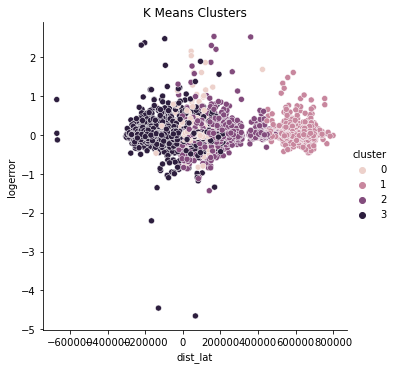

In [59]:
sns.relplot(data=train1, y='logerror', x='dist_lat', hue='cluster')
plt.title('K Means Clusters')
plt.show()

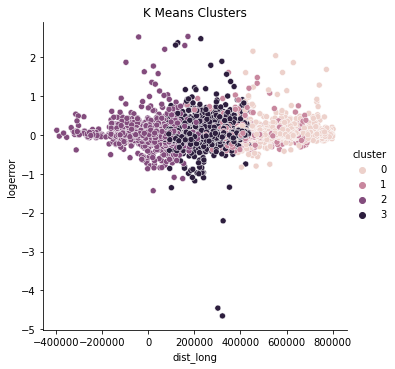

In [60]:
sns.relplot(data=train1, y='logerror', x='dist_long', hue='cluster')
plt.title('K Means Clusters')
plt.show()